This notebook contains code to explore redundancy and clusters in different sets of predictors

In [12]:
%load_ext rpy2.ipython

%R library(Hmisc)
%R library(rms)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['rms', 'SparseM', 'Hmisc', 'ggplot2', 'Formula', 'survival',
       'splines', 'lattice', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [16]:
# Data file
src_data_file = '../data/data.csv'

# Number of Multiple imputation
num_imp = 50

### Full Model (KGH compatible)

In [21]:
variables = ['Disposition', 'cycletime', 'PatientAge', 'FeverTemperature',
             'Headache', 'Bleeding', 'Diarrhoea', 'Jaundice', 'Vomit',
             'AbdominalPain', 'AstheniaWeakness']
mdl_formula = 'Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))+rcs(FeverTemperature,3,c(35,37,40))+' + \
              'Headache+Bleeding+Diarrhoea+Jaundice+Vomit+' + \
              'AbdominalPain+AstheniaWeakness'
imp_formula = '~' + '+'.join(variables)

print 'Variables:', variables
print ''
print 'Imputation formula:', imp_formula 
print ''
print 'Model formula:', mdl_formula 

Variables: ['Disposition', 'cycletime', 'PatientAge', 'FeverTemperature', 'Headache', 'Bleeding', 'Diarrhoea', 'Jaundice', 'Vomit', 'AbdominalPain', 'AstheniaWeakness']

Imputation formula: ~Disposition+cycletime+PatientAge+FeverTemperature+Headache+Bleeding+Diarrhoea+Jaundice+Vomit+AbdominalPain+AstheniaWeakness

Model formula: Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))+rcs(FeverTemperature,3,c(35,37,40))+Headache+Bleeding+Diarrhoea+Jaundice+Vomit+AbdominalPain+AstheniaWeakness


~Disposition + cycletime + PatientAge + FeverTemperature + Headache + 
    Bleeding + Diarrhoea + Jaundice + Vomit + AbdominalPain + 
    AstheniaWeakness
Iteration 53 
Disposition ~ cycletime + rcs(PatientAge, 3, c(5, 10, 30)) + 
    rcs(FeverTemperature, 3, c(35, 37, 40)) + Headache + Bleeding + 
    Diarrhoea + Jaundice + Vomit + AbdominalPain + AstheniaWeakness

Variance Inflation Factors Due to Imputation:

        Intercept         cycletime        PatientAge       PatientAge' 
             1.11              1.33              1.13              1.12 
 FeverTemperature FeverTemperature'          Headache          Bleeding 
             1.10              1.09              1.08              1.09 
        Diarrhoea          Jaundice             Vomit     AbdominalPain 
             1.21              1.08              1.09              1.06 
 AstheniaWeakness 
             1.10 

Rate of Missing Information:

        Intercept         cycletime        PatientAge       PatientAge' 
    

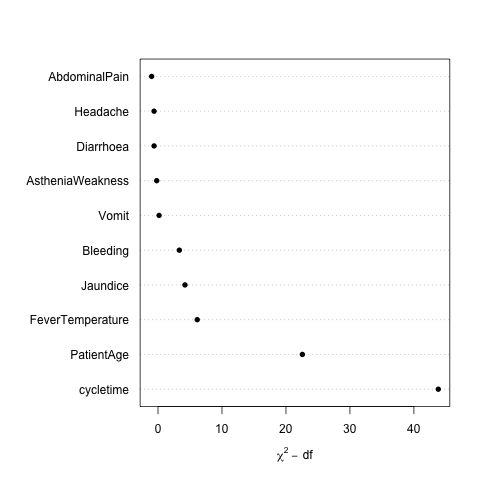

In [22]:
%%R -i num_imp,imp_formula,mdl_formula,src_data_file

src_data <- read.table(src_data_file, sep=",", header=TRUE, na.strings="\\N")

formula <- as.formula(imp_formula)
print(formula)
a <- aregImpute(formula, data=src_data, n.impute=num_imp)

formula <- as.formula(mdl_formula)
print(formula)
f <- fit.mult.impute(formula, lrm, a, data=src_data)

print(f)
an <- anova(f)
print(an)
plot(an)

### Minimal Model (KGH compatible)

In [23]:
variables = ['Disposition', 'cycletime', 'PatientAge']
mdl_formula = 'Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))'
imp_formula = '~' + '+'.join(variables)

print 'Variables:', variables
print ''
print 'Imputation formula:', imp_formula 
print ''
print 'Model formula:', mdl_formula 

Variables: ['Disposition', 'cycletime', 'PatientAge']

Imputation formula: ~Disposition+cycletime+PatientAge

Model formula: Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))


~Disposition + cycletime + PatientAge
Iteration 53 
Disposition ~ cycletime + rcs(PatientAge, 3, c(5, 10, 30))

Variance Inflation Factors Due to Imputation:

  Intercept   cycletime  PatientAge PatientAge' 
       1.45        1.56        1.12        1.14 

Rate of Missing Information:

  Intercept   cycletime  PatientAge PatientAge' 
       0.31        0.36        0.10        0.12 

d.f. for t-distribution for Tests of Single Coefficients:

  Intercept   cycletime  PatientAge PatientAge' 
     513.65      384.12     4504.05     3324.86 

The following fit components were averaged over the 50 model fits:

  stats linear.predictors 


Logistic Regression Model

fit.mult.impute(formula = formula, fitter = lrm, xtrans = a, 
    data = src_data)

                      Model Likelihood     Discrimination    Rank Discrim.    
                         Ratio Test            Indexes          Indexes       
Obs           470    LR chi2      96.85    R2       0.250    C       0.761    
 0        

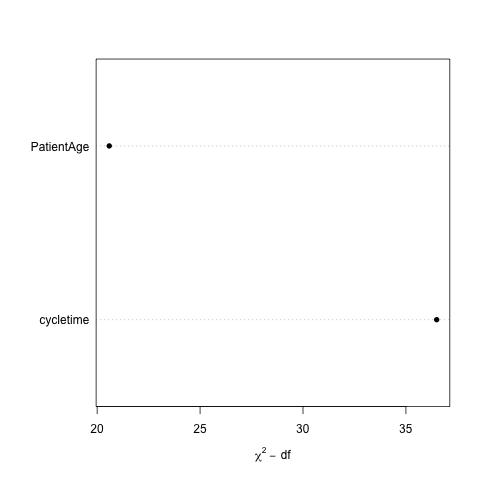

In [24]:
%%R -i num_imp,imp_formula,mdl_formula,src_data_file

src_data <- read.table(src_data_file, sep=",", header=TRUE, na.strings="\\N")

formula <- as.formula(imp_formula)
print(formula)
a <- aregImpute(formula, data=src_data, n.impute=num_imp)

formula <- as.formula(mdl_formula)
print(formula)
f <- fit.mult.impute(formula, lrm, a, data=src_data)

print(f)
an <- anova(f)
print(an)
plot(an)

### Full Model (KGH compatible), Sierra Leone only

In [10]:
variables = ['Disposition', 'cycletime', 'PatientAge', 'FeverTemperature',
             'Headache', 'Bleeding', 'Diarrhoea', 'Jaundice', 'Vomit',
             'AbdominalPain', 'AstheniaWeakness']
mdl_formula = 'Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))+rcs(FeverTemperature,3,c(35,37,40))+' + \
              'Headache+Bleeding+Diarrhoea+Jaundice+Vomit+' + \
              'AbdominalPain+AstheniaWeakness'
imp_formula = '~' + '+'.join(variables)

print 'Variables:', variables
print ''
print 'Imputation formula:', imp_formula 
print ''
print 'Model formula:', mdl_formula 

Variables: ['Disposition', 'cycletime', 'PatientAge', 'FeverTemperature', 'Headache', 'Bleeding', 'Diarrhoea', 'Jaundice', 'Vomit', 'AbdominalPain', 'AstheniaWeakness']

Imputation formula: ~Disposition+cycletime+PatientAge+FeverTemperature+Headache+Bleeding+Diarrhoea+Jaundice+Vomit+AbdominalPain+AstheniaWeakness

Model formula: Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))+rcs(FeverTemperature,3,c(35,37,40))+Headache+Bleeding+Diarrhoea+Jaundice+Vomit+AbdominalPain+AstheniaWeakness


~Disposition + cycletime + PatientAge + FeverTemperature + Headache + 
    Bleeding + Diarrhoea + Jaundice + Vomit + AbdominalPain + 
    AstheniaWeakness
Iteration 8 
Disposition ~ cycletime + rcs(PatientAge, 3, c(5, 10, 30)) + 
    rcs(FeverTemperature, 3, c(35, 37, 40)) + Headache + Bleeding + 
    Diarrhoea + Jaundice + Vomit + AbdominalPain + AstheniaWeakness

Variance Inflation Factors Due to Imputation:

        Intercept         cycletime        PatientAge       PatientAge' 
             1.06              1.38              1.09              1.03 
 FeverTemperature FeverTemperature'          Headache          Bleeding 
             1.06              1.02              1.11              1.11 
        Diarrhoea          Jaundice             Vomit     AbdominalPain 
             1.38              1.00              1.20              1.13 
 AstheniaWeakness 
             1.99 

Rate of Missing Information:

        Intercept         cycletime        PatientAge       PatientAge' 
     

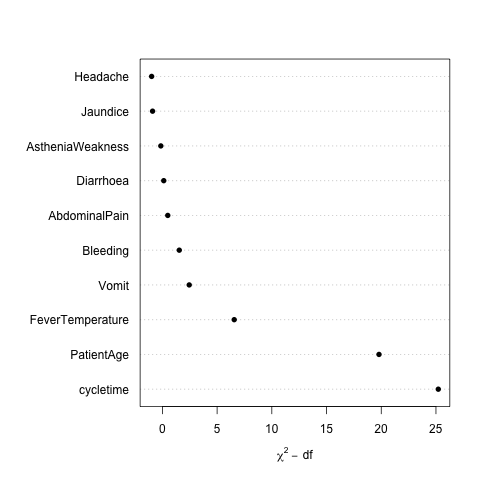

In [11]:
%%R -i num_imp,imp_formula,mdl_formula,src_data_file

src_data <- read.table(src_data_file, sep=",", header=TRUE, na.strings="\\N")
src_data <- src_data[src_data$ETUKey %in% c(2, 4, 5),]

formula <- as.formula(imp_formula)
print(formula)
a <- aregImpute(formula, data=src_data, n.impute=num_imp)

formula <- as.formula(mdl_formula)
print(formula)
f <- fit.mult.impute(formula, lrm, a, data=src_data)

print(f)
an <- anova(f)
print(an)
plot(an)

### Medium Model (KGH compatible), Sierra Leone only

In [22]:
variables = ['Disposition', 'cycletime', 'PatientAge', 'FeverTemperature',
             'Bleeding', 'Vomit',
             'AbdominalPain', 'AstheniaWeakness']
mdl_formula = 'Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))+rcs(FeverTemperature,3,c(35,37,40))+' + \
              'Bleeding+Vomit+' + \
              'AbdominalPain+AstheniaWeakness'
imp_formula = '~' + '+'.join(variables)

print 'Variables:', variables
print ''
print 'Imputation formula:', imp_formula 
print ''
print 'Model formula:', mdl_formula 

Variables: ['Disposition', 'cycletime', 'PatientAge', 'FeverTemperature', 'Bleeding', 'Vomit', 'AbdominalPain', 'AstheniaWeakness']

Imputation formula: ~Disposition+cycletime+PatientAge+FeverTemperature+Bleeding+Vomit+AbdominalPain+AstheniaWeakness

Model formula: Disposition~cycletime+rcs(PatientAge,3,c(5,10,30))+rcs(FeverTemperature,3,c(35,37,40))+Bleeding+Vomit+AbdominalPain+AstheniaWeakness


~Disposition + cycletime + PatientAge + FeverTemperature + Bleeding + 
    Vomit + AbdominalPain + AstheniaWeakness
Iteration 8 
Disposition ~ cycletime + rcs(PatientAge, 3, c(5, 10, 30)) + 
    rcs(FeverTemperature, 3, c(35, 37, 40)) + Bleeding + Vomit + 
    AbdominalPain + AstheniaWeakness

Variance Inflation Factors Due to Imputation:

        Intercept         cycletime        PatientAge       PatientAge' 
             2.96              3.37              1.63              1.17 
 FeverTemperature FeverTemperature'          Bleeding             Vomit 
             2.81              2.56              1.36              1.72 
    AbdominalPain  AstheniaWeakness 
             1.31              1.49 

Rate of Missing Information:

        Intercept         cycletime        PatientAge       PatientAge' 
             0.66              0.70              0.38              0.15 
 FeverTemperature FeverTemperature'          Bleeding             Vomit 
             0.64              0.61       

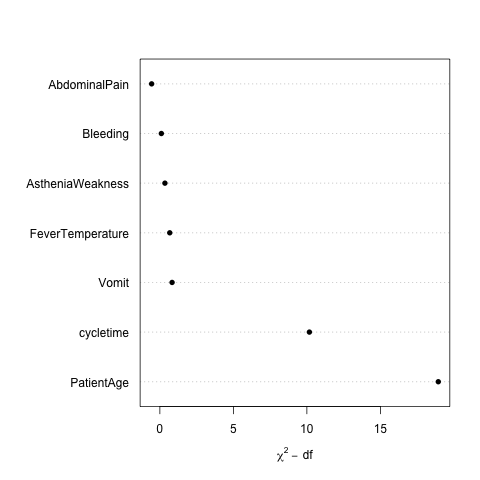

In [23]:
%%R -i num_imp,imp_formula,mdl_formula,src_data_file

src_data <- read.table(src_data_file, sep=",", header=TRUE, na.strings="\\N")
src_data <- src_data[src_data$ETUKey %in% c(2, 4, 5),]

formula <- as.formula(imp_formula)
print(formula)
a <- aregImpute(formula, data=src_data, n.impute=num_imp)

formula <- as.formula(mdl_formula)
print(formula)
f <- fit.mult.impute(formula, lrm, a, data=src_data)

print(f)
an <- anova(f)
print(an)
plot(an)